# Classifying Pulsars (Neutron stars) with Random Forest

## About Dataset

Author: Rob Lyon, School of Computer Science & Jodrell Bank Centre for Astrophysics,
		University of Manchester, Kilburn Building, Oxford Road, Manchester M13 9PL.

Contact:	rob@scienceguyrob.com or robert.lyon@.manchester.ac.uk
Web:		http://www.scienceguyrob.com or http://www.cs.manchester.ac.uk
			or alternatively http://www.jb.man.ac.uk
******************************************************************************************

1. Overview

	HTRU2 is a data set which describes a sample of pulsar candidates collected during the
	High Time Resolution Universe Survey (South) [1]. 
	
	Pulsars are a rare type of Neutron star that produce radio emission detectable here on
	Earth. They are of considerable scientific interest as probes of space-time, the inter-
	stellar medium, and states of matter (see [2] for more uses). 
	
	As pulsars rotate, their emission beam sweeps across the sky, and when this crosses
	our line of sight, produces a detectable pattern of broadband radio emission. As pulsars
	rotate rapidly, this pattern repeats periodically. Thus pulsar search involves looking
	for periodic radio signals with large radio telescopes.
	
	Each pulsar produces a slightly different emission pattern, which varies slightly with each
	rotation (see [2] for an introduction to pulsar astrophysics to find out why). Thus a 
	potential signal detection known as a 'candidate', is averaged over many rotations of the
	pulsar, as determined by the length of an observation. In the absence of additional info,
	each candidate could potentially describe a real pulsar. However in practice almost all
	detections are caused by radio frequency interference (RFI) and noise, making legitimate
	signals hard to find.
	
	Machine learning tools are now being used to automatically label pulsar candidates to
	facilitate rapid analysis. Classification systems in particular are being widely adopted,
	(see [4,5,6,7,8,9]) which treat the candidate data sets  as binary classification problems.
	Here the legitimate pulsar examples are a minority positive class, and spurious examples
	the majority negative class. At present multi-class labels are unavailable, given the
	costs associated with data annotation.
	
	The data set shared here contains 16,259 spurious examples caused by RFI/noise, and 1,639
	real pulsar examples. These examples have all been checked by human annotators. Each
	candidate is described by 8 continuous variables. The first four are simple statistics
	obtained from the integrated pulse profile (folded profile). This is an array of continuous
	variables that describe a longitude-resolved version of the signal that has been averaged
	in both time and frequency (see [3] for more details). The remaining four variables are
	similarly obtained from the DM-SNR curve (again see [3] for more details). These are 
	summarised below:
	
	1. Mean of the integrated profile.
	2. Standard deviation of the integrated profile.
	3. Excess kurtosis of the integrated profile.
	4. Skewness of the integrated profile.
	5. Mean of the DM-SNR curve.
	6. Standard deviation of the DM-SNR curve.
	7. Excess kurtosis of the DM-SNR curve.
	8. Skewness of the DM-SNR curve.
	
	HTRU 2 Summary
	
	17,898 total examples.
	1,639 positive examples.
	16,259 negative examples.
	
	
	The data is presented in two formats: CSV and ARFF (used by the WEKA data mining tool).
	Candidates are stored in both files in separate rows. Each row lists the variables first,
	and the class label is the final entry. The class labels used are 0 (negative) and 1 
	(positive).
	
	Please not that the data contains no positional information or other astronomical details. It is 
	simply feature data extracted from candidate files using the PulsarFeatureLab tool (see [10]).

2. Citing our work	
	
	If you use the dataset in your work please cite us using the DOI of the dataset, and the paper:
	
	R. J. Lyon, B. W. Stappers, S. Cooper, J. M. Brooke, J. D. Knowles, Fifty Years of Pulsar
	Candidate Selection: From simple filters to a new principled real-time classification approach
	MNRAS, 2016.
	
3. Acknowledgements

	This data was obtained with the support of grant EP/I028099/1 for the University of Manchester 
	Centre for Doctoral Training in Computer Science, from the UK Engineering and Physical Sciences
	Research Council (EPSRC). The raw observational data was collected by the High Time Resolution
	Universe Collaboration using the Parkes Observatory, funded by the Commonwealth of Australia and
	managed by the CSIRO.
	
4. References

	[1] M.~J. Keith et al., "The High Time Resolution Universe Pulsar Survey - I. System Configuration 
	    and Initial Discoveries",2010, Monthly Notices of the Royal Astronomical Society, vol. 409,
	    pp. 619-627. DOI: 10.1111/j.1365-2966.2010.17325.x
	
	[2] D. R. Lorimer and M. Kramer, "Handbook of Pulsar Astronomy", Cambridge University Press, 2005.
	
	[3] R. J. Lyon, "Why Are Pulsars Hard To Find?", PhD Thesis, University of Manchester, 2015.
	
	[4] R. J. Lyon et al., "Fifty Years of Pulsar Candidate Selection: From simple filters to a new
		principled real-time classification approach", Monthly Notices of the Royal Astronomical Society,
		submitted.
		
	[5] R. P. Eatough et al., "Selection of radio pulsar candidates using artificial neural networks",
		Monthly Notices of the Royal Astronomical Society, vol. 407, no. 4, pp. 2443-2450, 2010.
		
	[6] S. D. Bates et al., "The high time resolution universe pulsar survey vi. an artificial neural
		network and timing of 75 pulsars", Monthly Notices of the Royal Astronomical Society, vol. 427,
		no. 2, pp. 1052-1065, 2012.

	[7] D. Thornton, "The High Time Resolution Radio Sky", PhD thesis, University of Manchester,
		Jodrell Bank Centre for Astrophysics School of Physics and Astronomy, 2013.
		
	[8] K. J. Lee et al., "PEACE: pulsar evaluation algorithm for candidate extraction a software package
		for post-analysis processing of pulsar survey candidates", Monthly Notices of the Royal Astronomical
		Society, vol. 433, no. 1, pp. 688-694, 2013.
		
	[9] V. Morello et al., "SPINN: a straightforward machine learning solution to the pulsar candidate
		selection problem", Monthly Notices of the Royal Astronomical Society, vol. 443, no. 2,
		pp. 1651-1662, 2014.
		
	[10] R. J. Lyon, "PulsarFeatureLab", 2015, https://dx.doi.org/10.6084/m9.figshare.1536472.v1.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../data/HTRU_2.csv', header=None)
df.columns = ['IpMean', 'IpDev', 'IpKurt','IpSkew', 'DMMean', 'DMDev', 'DMKurt', 'DMSkew', 'Class']
df.head()

IpMean      IpDev    IpKurt    IpSkew    DMMean      DMDev     DMKurt  \
0  140.562500  55.683782 -0.234571 -0.699648  3.199833  19.110426   7.975532   
1  102.507812  58.882430  0.465318 -0.515088  1.677258  14.860146  10.576487   
2  103.015625  39.341649  0.323328  1.051164  3.121237  21.744669   7.735822   
3  136.750000  57.178449 -0.068415 -0.636238  3.642977  20.959280   6.896499   
4   88.726562  40.672225  0.600866  1.123492  1.178930  11.468720  14.269573   

       DMSkew  Class  
0   74.242225      0  
1  127.393580      0  
2   63.171909      0  
3   53.593661      0  
4  252.567306      0

In [3]:
df.shape

(17898, 9)

In [4]:
# IpSkew
print('1:\n',df['IpSkew'].loc[df['Class'] == 1].describe())
print('0:\n',df['IpSkew'].loc[df['Class'] == 0].describe())

1:
 count    1639.000000
mean       15.553576
std        13.997200
min        -1.139069
25%         3.805492
50%        11.609644
75%        24.881853
max        68.101622
Name: IpSkew, dtype: float64
0:
 count    16259.000000
mean         0.380844
std          1.027791
min         -1.791886
25%         -0.221980
50%          0.124107
75%          0.663383
max         24.872429
Name: IpSkew, dtype: float64


In [5]:
# IpKurt
print('1:\n',df['IpKurt'].loc[df['Class'] == 1].describe())
print('0:\n',df['IpKurt'].loc[df['Class'] == 0].describe())

1:
 count    1639.000000
mean        3.130655
std         1.872861
min        -0.094888
25%         1.556038
50%         2.961258
75%         4.586930
max         8.069522
Name: IpKurt, dtype: float64
0:
 count    16259.000000
mean         0.210440
std          0.334606
min         -1.876011
25%          0.008650
50%          0.186665
75%          0.392892
max          4.785786
Name: IpKurt, dtype: float64


In [6]:
# IpDev
print('1:\n',df['IpDev'].loc[df['Class'] == 1].describe())
print('0:\n',df['IpDev'].loc[df['Class'] == 0].describe())

1:
 count    1639.000000
mean       38.710598
std         8.033614
min        24.772042
25%        32.284803
50%        37.341297
75%        43.759278
max        83.796909
Name: IpDev, dtype: float64
0:
 count    16259.000000
mean        47.339741
std          6.182929
min         28.698714
25%         43.384645
50%         47.485647
75%         51.315620
max         98.778911
Name: IpDev, dtype: float64


<Axes: >

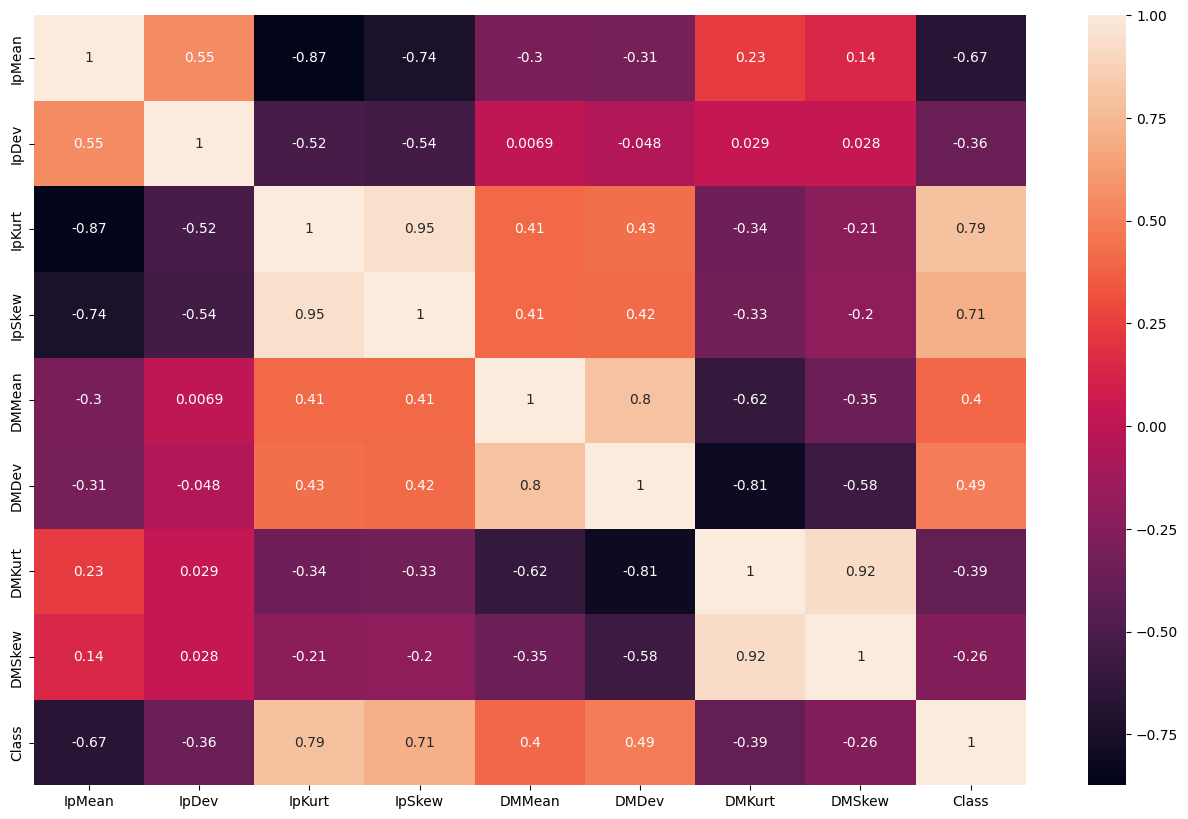

In [7]:
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(), annot=True)

In [8]:
fig = px.scatter(df, x="IpSkew", y='IpKurt',log_x=True, width = 1000, color="Class")
fig.update_traces(marker = dict(size = 12, line=dict(width = 2)), selector = dict(mode = 'markers'))
fig.show()

In [9]:
fig = px.scatter(df, x="IpDev", y='DMDev',log_x=True, width = 1000, color="Class")
fig.update_traces(marker = dict(size = 12, line=dict(width = 2)), selector = dict(mode = 'markers'))
fig.show()

In [10]:
# IpMean
print('1:\n',df['IpMean'].loc[df['Class'] == 1].describe())
print('0:\n',df['IpMean'].loc[df['Class'] == 0].describe())

1:
 count    1639.000000
mean       56.690608
std        30.007707
min         5.812500
25%        31.777344
50%        54.296875
75%        79.277344
max       139.257812
Name: IpMean, dtype: float64
0:
 count    16259.000000
mean       116.562726
std         17.475932
min         17.210938
25%        105.253906
50%        117.257812
75%        128.285156
max        192.617188
Name: IpMean, dtype: float64


In [11]:
fig = px.scatter(df, x="IpMean", y='DMMean',log_x=True, width = 1000, color="Class")
fig.update_traces(marker = dict(size = 12, line=dict(width = 2)), selector = dict(mode = 'markers'))
fig.show()

In [12]:
fig = px.scatter_3d(df, x="IpMean", y='IpKurt', z='IpSkew', log_x=True, width = 1200, color="Class")
fig.update_traces(marker = dict(size = 12, line=dict(width = 2)), selector = dict(mode = 'markers'))
fig.show()

In [13]:
fig = px.scatter_3d(df, x="DMMean", y='DMKurt', z='DMSkew', log_x=True, width = 1200, color="Class")
fig.update_traces(marker = dict(size = 12, line=dict(width = 2)), selector = dict(mode = 'markers'))
fig.show()

In [14]:
x = df[df.columns[:4]].values
y = df[df.columns[-1]].values

In [15]:
# normalizing data
scaler = StandardScaler()
x = scaler.fit_transform(x)
lab = LabelEncoder()
y = lab.fit_transform(y)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [17]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, random_state=1)

In [18]:
y_hat = model.predict(x_test)

In [19]:
accuracy_score(y_test, y_hat)

0.978838665989504

[[5356   25]
 [ 100  426]]


<Axes: >

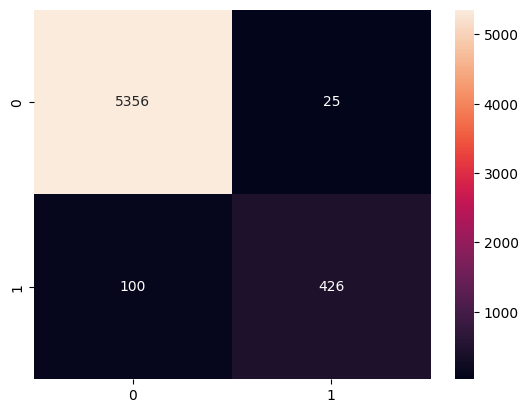

In [20]:
print(confusion_matrix(y_test, y_hat))
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='d')
